# Jupyter notebook implementing feature selection for US Census database.
To run this file successfully, you will need to have the necessary data files in the same directory as this file.

# Step 1: Parse the file.

In [77]:
# This code parses the column headings

import pandas as pd
names = pd.read_csv('namesFile', delimiter='\t',header=None)

namesList = names[0].tolist()

namesListFormatted = []
dataTypeDict = {}

for name in namesList:
    split = name.split(": ")
    namesListFormatted.append(split[0])
    values = split[1].split(", ")
    dataTypeDict[split[0]] = values

output = 'income level'
namesListFormatted.append(output)
dataTypeDict[output] = [' 50000+.',' - 50000.']


# namesListFormatted and dataTypeDict are now initialized with, respectively,
# the feature names, and a dictionary of the possible values for each feature

In [78]:
# read in the learning data from the csv file 

census = pd.read_csv("census_income_learn.csv", names=namesListFormatted)

In [79]:
# To get more information about the data
#census.head()
#census.info()

# Step 2: Drop the rows with missing values.

In [80]:
# condition with df.values property
mask = (census != ' ?')

# new dataframe
census_new = census[mask]

# drop the values
census = census_new.dropna()

# Step 3: Divide the data into two subgroups - numerical and categorical.

In [81]:
# This separates the data into categorical and numerical values

listNumCols = [] # list containing the column headings of numerical data
listCatCols = [] # list containing the column headings of categorical data 

# Loop over the column names
for i in census.columns:
    
    if(dataTypeDict[i]==['continuous.']):
        # list of headers for numerica data
        listNumCols.append(i)
    else:
        # list of headers for categorical data
        listCatCols.append(i)

census_num = census[listNumCols] # new df containing numerical data
census_cat = census[listCatCols] # new df containing categorical data
census_num

,age,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,weeks worked in year
1,58,0,0,0,0,1053.55,1,52
3,9,0,0,0,0,1758.14,0,0
4,10,0,0,0,0,1069.16,0,0
6,42,0,5178,0,0,1535.86,6,52
9,34,0,0,0,0,1146.79,6,52
...,...,...,...,...,...,...,...,...
199509,47,0,0,0,0,2625.77,6,52
199510,25,0,0,0,0,2764.79,4,52
199514,51,0,0,0,0,1302.34,6,52
199516,3,0,0,0,0,2733.75,0,0


# Test the normality of the numerical data.

No handles with labels found to put in legend.


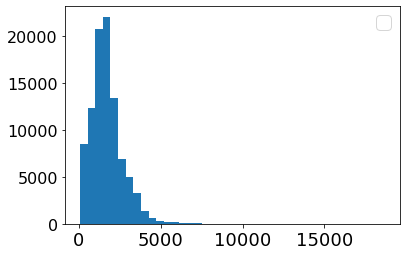

In [82]:
# Test the normality of the data
%matplotlib inline
from matplotlib import pyplot

#pyplot.hist(census_num['capital losses'],bins=40)
pyplot.hist(census_num[listNumCols[5]],bins=40)
#plt.xlabel('Features', fontsize = 16)
#plt.ylabel('Feature Score', fontsize = 20)
plt.legend(fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 16)

pyplot.locator_params(axis='x', nbins=5)
pyplot.show()

# Remove the duplicate data.

In [47]:
# Select duplicate rows except first occurrence based on all columns
#duplicate_rows = census[census.duplicated()]

# remove duplicate rows (not sure if this is working)
#census = census.drop_duplicates()

#print(census)

# Step 4: Encode the categorical data and run Chi-squared on training data.

In [83]:
# Encode the categorical data here so the chi sqaured test can be used

from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


X = census_cat.iloc[:,:-1] # independent variables
y = census_cat.iloc[:,-1] # dependent variable

# encoding the dependent variable
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

# encoding the categorical data to ordinal values
oe = OrdinalEncoder()
oe.fit(X) # fit the ordinal encoder
X_enc = oe.transform(X)



fs = SelectKBest(score_func=chi2,k=20)
#print(X)
# need to encode the features 

fit = fs.fit(X_enc, y_enc)
fit.scores_
X_fs = fs.fit_transform(X_enc,y_enc)
print(fs.scores_) # chi-squared scores


#X['year'].describe()
#X['full or part time employment stat'].describe()

[3.48221822e+02 6.97292325e+04 4.45700998e+02 1.48260814e+03
 2.42617421e+01 1.42769669e+03 7.24174720e+02 5.55582486e+02
 3.61636761e+01 1.72759189e+03 1.16501473e+03 1.21690902e+01
 9.32123298e-02            nan 1.05620752e+03 3.74229678e-02
 5.88567293e+01 3.29226088e+03 4.36115074e+02 1.19885147e+01
 4.44015858e+00 2.56375995e+00 4.92960039e+01 3.17687463e-02
 1.77681990e+03 4.58912538e+01 4.07139356e+01 7.61919607e+00
 9.30159074e+00 2.34489662e+02 5.20511929e-01 8.77288795e+02
            nan]


# Step 5: Plot the scores from Chi-squared test.

No handles with labels found to put in legend.


Feature 0, class of worker : 348.221822
Feature 2, detailed occupation recode : 445.700998
Feature 3, education : 1482.608135
Feature 4, enroll in edu inst last wk : 24.261742
Feature 5, marital stat : 1427.696690
Feature 6, major industry code : 724.174720
Feature 7, major occupation code : 555.582486
Feature 8, race : 36.163676
Feature 9, hispanic origin : 1727.591888
Feature 10, sex : 1165.014727
Feature 11, member of a labor union : 12.169090
Feature 12, reason for unemployment : 0.093212
Feature 13, full or part time employment stat : nan
Feature 14, tax filer stat : 1056.207522
Feature 15, region of previous residence : 0.037423
Feature 16, state of previous residence : 58.856729
Feature 18, detailed household summary in household : 436.115074
Feature 19, migration code-change in msa : 11.988515
Feature 20, migration code-change in reg : 4.440159
Feature 21, migration code-move within reg : 2.563760
Feature 22, live in this house 1 year ago : 49.296004
Feature 23, migration prev 

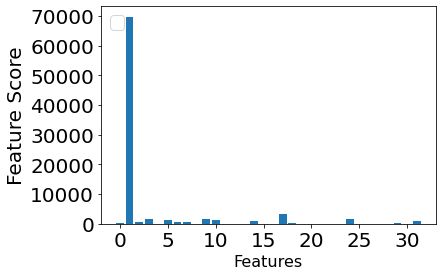

In [85]:
# what are scores for the features
from matplotlib import pyplot

for i in range(len(fs.scores_)):
    print('Feature %d, %s : %f' % (i, census_cat.columns[i], fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Features', fontsize = 16)
plt.ylabel('Feature Score', fontsize = 20)
plt.legend(fontsize = 18)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
pyplot.show()

# Plot the p-value from the Chi-squared test.

# Step 6: Run ANOVA on numerical data using the training sample.

In [52]:
# ANOVA f-test
from sklearn.feature_selection import f_classif

X_train = census_num.iloc[:,:] # continuous independent variables
y_train = y_enc # dependent variable encoded with cat data

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
fs.fit(X_train, y_train)

# transform train input data
X_train_fs = fs.transform(X_train)


# transform test input data
#X_test_fs = fs.transform(X_test)

# Plot the results.

No handles with labels found to put in legend.


Feature 0 age : 1758.762734
Feature 1 wage per hour : 36.403934
Feature 2 capital gains : 5893.363346
Feature 3 capital losses : 2304.009532
Feature 4 dividends from stocks : 3224.038928
Feature 5 instance weight : 27.212517
Feature 6 num persons worked for employer : 4345.297611
Feature 7 weeks worked in year : 6494.003538


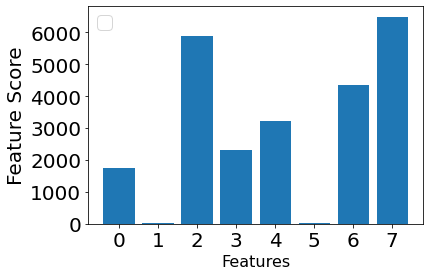

In [54]:
# Plot scores for the features

from matplotlib import pyplot


for i in range(len(fs.scores_)):
    print('Feature %d %s : %f' % (i, census_num.columns[i], fs.scores_[i]))

# plot the scores

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
#plt.xlabel()
plt.xlabel('Features', fontsize = 16)
plt.ylabel('Feature Score', fontsize = 20)
plt.legend(fontsize = 18)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
pyplot.show()

In [ ]:
# Plot the p-value